In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, preprocessing
%matplotlib notebook

In [25]:
import numbers
from sklearn.utils import check_array, check_random_state
from sklearn.utils import shuffle as shuffle_

def make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0,
               center_box=(-10.0, 10.0), shuffle=True, random_state=None):
    generator = check_random_state(random_state)

    if isinstance(centers, numbers.Integral):
        centers = generator.uniform(center_box[0], center_box[1],
                                    size=(centers, n_features))
    else:
        centers = check_array(centers)
        n_features = centers.shape[1]

    if isinstance(cluster_std, numbers.Real):
        cluster_std = np.ones(len(centers)) * cluster_std

    X = []
    y = []

    n_centers = centers.shape[0]
    if isinstance(n_samples, numbers.Integral):
        n_samples_per_center = [int(n_samples // n_centers)] * n_centers
        for i in range(n_samples % n_centers):
            n_samples_per_center[i] += 1
    else:
        n_samples_per_center = n_samples

    for i, (n, std) in enumerate(zip(n_samples_per_center, cluster_std)):
        X.append(centers[i] + generator.normal(scale=std,
                                               size=(n, n_features)))
        y += [i] * n

    X = np.concatenate(X)
    y = np.array(y)

    if shuffle:
        X, y = shuffle_(X, y, random_state=generator)

    return X, y

In [26]:
X, y = make_blobs(centers=4, random_state=8)
X_new = np.hstack([X, X[:, 1:]**2])
y = y % 2

In [27]:
clf = svm.SVC(kernel='linear')
clf.fit(X_new, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
coef = clf.coef_.ravel()
intercept = clf.intercept_

<IPython.core.display.Javascript object>


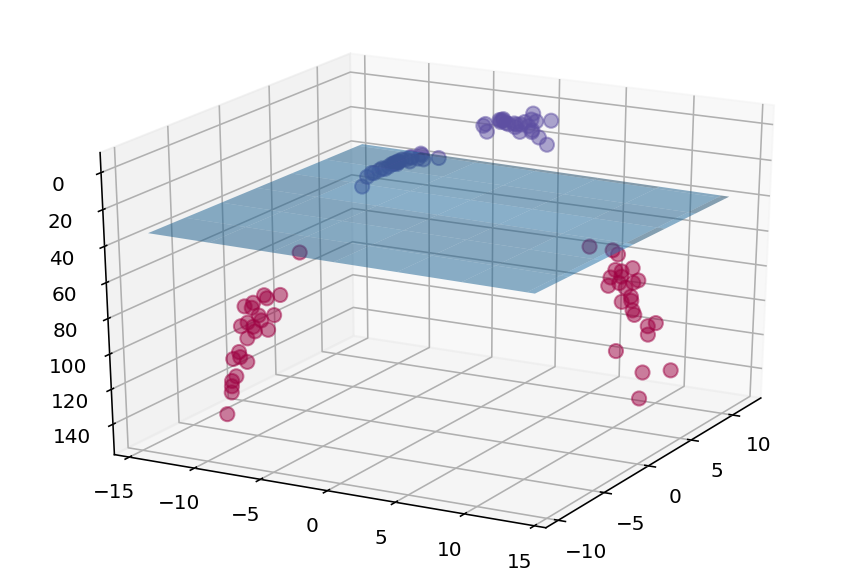

In [29]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
#%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min()-2, X_new[:, 0].max()+2, 50)
yy = np.linspace(X_new[:, 1].min()-2, X_new[:, 1].max()+2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.5)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y, s=50, alpha=.5, cmap=plt.cm.Spectral)